**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 6**
Ingeniería de características (FE)

---

*   NOMBRE: <font color="#0679c8">Rodrigo González Rodríguez</font>
*   MATRÍCULA: <font color="#0679c8">A01796932</font>
*   NOMBRE: <font color="#0679c8">Wilson Edilmar Sanchez Hernandez</font>
*   MATRÍCULA: <font color="#0679c8">A01796996</font>
*   NOMBRE: <font color="#0679c8">Jorge Alberto Garcia Cardenas</font>
*   MATRÍCULA: <font color="#0679c8">A01796341</font>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/01 - Ciencia y analítica de datos/6.2 -"
os.chdir(DIR)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
cars_df = pd.read_csv('vehicles.csv')
cars_df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [5]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

# **Parte 1**. Preprocesamiento

1a)    Elimina las columnas que no serán relevantes para esta actividad: `id`, `VIN`, `url`, `image_url`, `description`, `posting_date`, `lat`, `long`.


In [6]:
cars_df = cars_df.drop(columns=['id', 'VIN','url','image_url','description','posting_date','lat','long'])

1b) Almacena en una variable la cantidad de observaciones o registros del dataframe y en otra el número de columnas (después del borrado) para análisis posteriores.

In [7]:
num_rows = cars_df.shape[0]
num_rows

426880

In [8]:
num_columns = cars_df.shape[1]
num_columns

18

<font color="#0679c8">Tenemos 426,880 filas y 18 columnas</font>


## Valores faltantes

Cuando la cantidad de valores faltantes en una columna es lo suficientemente grande (aproximadamente más del 25%), estimar e ingresar los valores faltantes no tiene sentido, y eliminar el atributo es mejor que estimar los valores faltantes. https://learning.oreilly.com/library/view/hands-on-data-preprocessing/9781801072137/B17397_11_Final_NM_ePub.xhtml#_idParaDest-188

Sin embargo, esto no es una regla aplicable a todos los escenarios y hay muchas discusiones en torno a ello. https://www.quora.com/How-much-missing-data-is-too-much-1

Para esta actividad  utilizaremos un umbral de 0.70 de la cantidad de registros (aquellas columnas que tengan 70% de valores no nulos). Considera además que estamos asumiendo que dichas variables son MCAR o MAR sin ninguna método gráfico o estadístico.

2a) Determina el porcentaje de valores faltantes por columna y elimina aquellas que posean el 30% o más de valores perdidos. Para ello utiliza el parámetro `thresh` de la función `dropna()` ¿Cuántas columnas se eliminaron?


In [9]:
missing_values = cars_df.isna().mean() * 100
missing_values = missing_values.reset_index()
missing_values.columns = ["column", "missing_values"]
missing_values[missing_values["missing_values"] > 30]

,column,missing_values
6,condition,40.785232
7,cylinders,41.622470
12,drive,30.586347
13,size,71.767476
15,paint_color,30.501078
16,county,100.000000


<font color="#0679c8">Tenemos 6 columnas con al menos un 30 % valores faltantes</font>

<font color="#0679c8">condition = 40.78 %</font>

<font color="#0679c8">cylinders = 41.62 %</font>

<font color="#0679c8">drive = 30.58 %</font>

<font color="#0679c8">size = 71.76 %</font>

<font color="#0679c8">paint_color = 30.5 %</font>

<font color="#0679c8">county = 100 %</font>

In [10]:
umbral = num_rows * 0.7
cars_df = cars_df.dropna(axis=1, thresh=umbral)

<font color="#0679c8">Definimos dentro del parametro thresh un umbral del 70 % (298,816) </font>

<font color="#0679c8">Confirmamos el numero de columnas resultante : </font>


In [11]:
cars_df.shape[1]

12

Además, cuando tenemos grandes conjuntos de datos, podemos eliminar filas que contienen valores nulos. Aunque, no se recomienda si el porcentaje de valores faltantes en el conjunto de datos es superior al 30%
https://medium.com/analytics-vidhya/how-to-deal-with-missing-values-in-data-set-8e8f70ecf155

2b) Borra los registros que contengan `NaN` en las columnas con menos del 5% de valores faltantes empleando el parámetro subset ¿Qué porcentaje de los registros iniciales se eliminaron?


In [12]:
#Filtramos las columnas con valores faltantes menor a 5%
missing_values[(missing_values["missing_values"] < 5) & (missing_values["missing_values"] > 0)]

,column,missing_values
3,year,0.282281
4,manufacturer,4.133714
5,model,1.236179
8,fuel,0.705819
9,odometer,1.030735
10,title_status,1.930753
11,transmission,0.598763


<font color="#0679c8">Tenemos 7 columnas con al menos del 5% de valores faltantes</font>

<font color="#0679c8">year(0.28%), manufacturer(4.13%), model(1.23%), fuel(0.7%), odometer(1.03), title_status(1.93%), transmission(0.59%)</font>


In [13]:
#Eliminamos los registros de las columnas con valores faltantes
missing_values_filter = missing_values[(missing_values["missing_values"] < 5) & (missing_values["missing_values"] > 0)].column
cars_df = cars_df.dropna(subset=missing_values_filter)
#Calculamos el porcentaje removido
percent_removed = (1 - (cars_df.shape[0] / num_rows)) * 100
percent_removed

8.732196401799097

<font color="#0679c8">El porcentaje de registros eliminados fue del 8.73 %</font>


2c) Si hay variables que aún poseen valores faltantes, utiliza el método de imputación apropiado (`mean, median, mode`)

In [14]:
#Filtramos aquellas con valores faltantes
cars_df.columns[cars_df.isna().sum() > 0]

Index(['type'], dtype='object')

<font color="#0679c8">Solo la variable "type" tiene valores faltantes aun, al ser una varianle categorica (object) lo recomendable seria usar la moda</font>

In [15]:
#Remplazamos los valores faltantes con la moda de la variable
cars_df['type'].fillna(cars_df['type'].mode()[0],inplace=True)

<ipython-input-15-07b446076873>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_df['type'].fillna(cars_df['type'].mode()[0],inplace=True)


In [16]:
#Confirmamos que ya no tengamos valores faltantes
cars_df['type'].isna().sum()

0

## Valores atípicos

3a) Obtén el histograma de las variables `price`, `year` y `odometer` para observar su distribución.

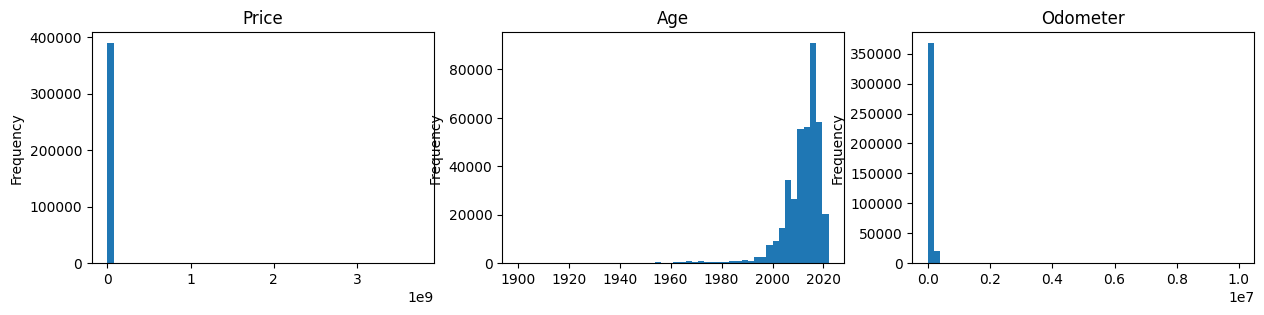

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3))
cars_df['price'].plot.hist(ax=axes[0], bins=50)
axes[0].set_title("Price")
cars_df['year'].plot.hist(ax=axes[1], bins=50)
axes[1].set_title("Age")
cars_df['odometer'].plot.hist(ax=axes[2], bins=50)
axes[2].set_title("Odometer")
plt.show()

3b) Añade la columna `age`, calculada a partir de `year`, para determinar los años del vehículo y una vez obtenida, elimina la columna `year`. Genera el histograma de la nueva variable.

In [18]:
#Creamos columna 'age'
cars_df['age'] = cars_df['year'].max() - cars_df['year']

In [19]:
#Eliminamos columna 'year'
cars_df.drop('year',axis=1, inplace=True)

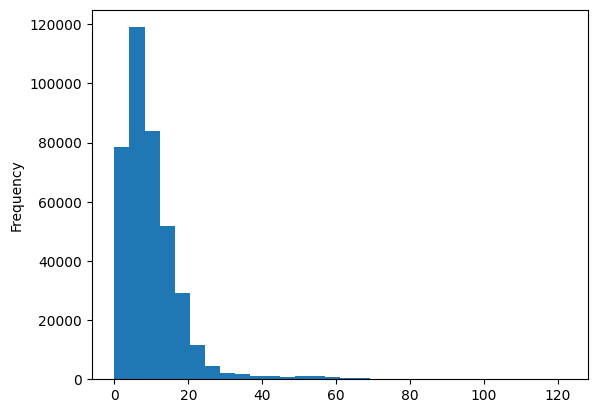

In [20]:
#Creamos el histograma para 'age'
cars_df['age'].plot.hist(bins=30)
plt.show()

4a) Para visualizar si hay valores atípicos, genera gráficos de box plot para las tres variables (`price, age, odometer`)

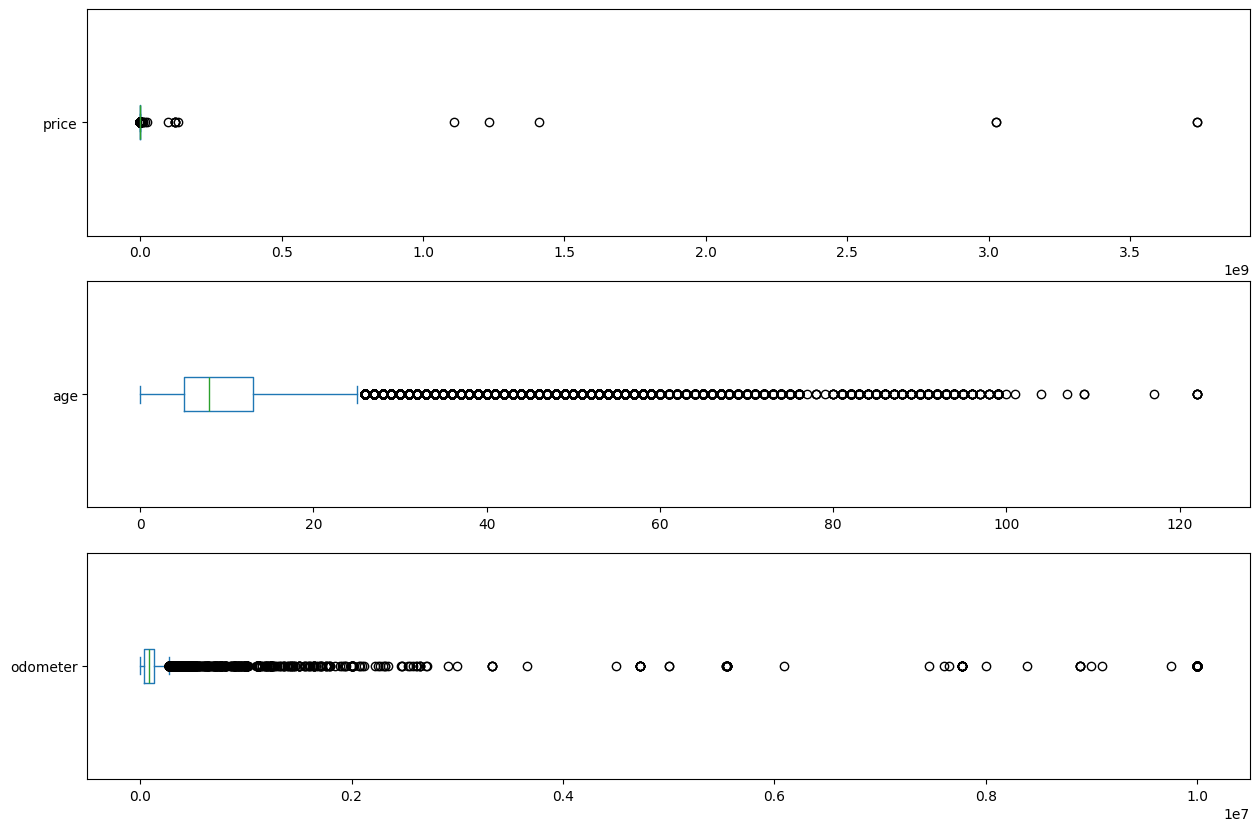

In [21]:
fig, axes = plt.subplots(3, 1, figsize=(15, 10))
cars_df['price'].plot.box(ax=axes[0], vert=False)
cars_df['age'].plot.box(ax=axes[1], vert=False)
cars_df['odometer'].plot.box(ax=axes[2], vert=False)
plt.show()

Si el conjunto de outliers es “relativamente grande” (aunque sabemos que deben andar alrededor de un 5% del conjunto total de datos), realizar una investigación particular sobre ellos que permita tomar mejores decisiones.

4b) Calcula, para cada variable, el porcentaje de sus valores atípicos y elimínalos del dataframe ¿Qué porcentaje de los registros iniciales se han eliminado en total hasta ahora?

In [22]:
#Analisis de 'price'
Q1 = cars_df['price'].quantile(0.25)
Q3 = cars_df['price'].quantile(0.75)
IQR = Q3-Q1
#Calculamos cantidad de valores atipicos de 'price'
price_outliers = (cars_df['price'] > (Q3+1.5 *IQR)) | (cars_df['price'] < (Q1-1.5 *IQR))
cars_df[price_outliers].price.count()

6656

In [23]:
#Calculamos el porcentaje de atipicos de price
(cars_df[price_outliers].price.count() * 100 ) / cars_df.shape[0]

1.7084013511154916

In [24]:
#Analisis de 'age'
Q1 = cars_df['age'].quantile(0.25)
Q3 = cars_df['age'].quantile(0.75)
IQR = Q3-Q1
#Calculamos cantidad de valores atipicos de 'age'
age_outliers = (cars_df['age'] > (Q3+1.5 *IQR)) | (cars_df['age'] < (Q1-1.5 *IQR))
cars_df[age_outliers].age.count()

14209

In [25]:
#Calculamos el porcentaje de atipicos de 'age'
(cars_df[age_outliers].age.count() * 100 ) / cars_df.shape[0]

3.6470364780649067

In [26]:
#Analisis de 'odometer'
Q1 = cars_df['odometer'].quantile(0.25)
Q3 = cars_df['odometer'].quantile(0.75)
IQR = Q3-Q1
#Calculamos cantidad de valores atipicos de 'odometer'
odometer_outliers = (cars_df['odometer'] > (Q3+1.5 *IQR)) | (cars_df['odometer'] < (Q1-1.5 *IQR))
cars_df[odometer_outliers].odometer.count()

3226

In [27]:
#Calculamos el porcentaje de atipicos de 'odometer'
(cars_df[odometer_outliers].odometer.count() * 100 ) / cars_df.shape[0]

0.8280202461987043

In [28]:
#Eliminamos outliers
cars_df = cars_df[~price_outliers]
cars_df = cars_df[~age_outliers]
cars_df = cars_df[~odometer_outliers]

<ipython-input-28-3101a35d5506>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cars_df = cars_df[~age_outliers]
<ipython-input-28-3101a35d5506>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cars_df = cars_df[~odometer_outliers]


In [29]:
#Calculamos porcentaje eliminado
percent_removed = (1 - (cars_df.shape[0] / num_rows)) * 100
percent_removed

14.184782608695656

<font color="#0679c8">Hasta ahora se ha eliminado el 14.18 %</font>

4c) Dibuja nuevamente los histogramas para observar claramente el sesgo de las variables tras la eliminación de los outliers.

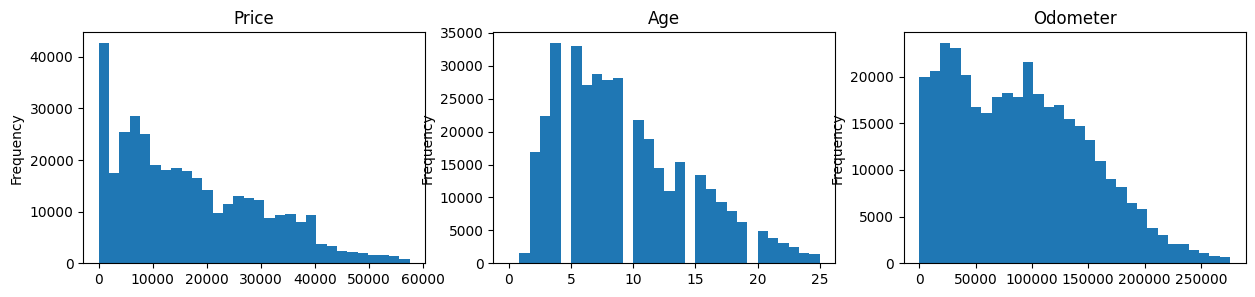

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3))
cars_df['price'].plot.hist(ax=axes[0], bins=30)
axes[0].set_title("Price")
cars_df['age'].plot.hist(ax=axes[1], bins=30)
axes[1].set_title("Age")
cars_df['odometer'].plot.hist(ax=axes[2], bins=30)
axes[2].set_title("Odometer")
plt.show()

# **Parte 2**. Ingeniería de características

## Transformando variables numéricas

La distribución de las variables determinará que método usar y en qué orden. Por ejemplo, en variables sesgadas se debe realizar primero la transformación  y luego el escalamiento, ya que el efecto deseado es "desinclinar" las distribuciones del eje y ese efecto se maximiza cuando aplica en el rango completo en comparación con aplicarlo en variables con una desviación estándar unitaria (por z-score) o variables en el rango [0,1] (por Min-Max).

Aplicar es escalamiento antes comprimiría la mayoría de los datos en un rango estrecho. Entonces se debe iniciar con transformar la característica en Gaussiana y luego escalarla.

5a) Genera gráficos Q-Q de las variables `price, age, odometer` para observar las diferencias entre sus distribuciones y la normal.


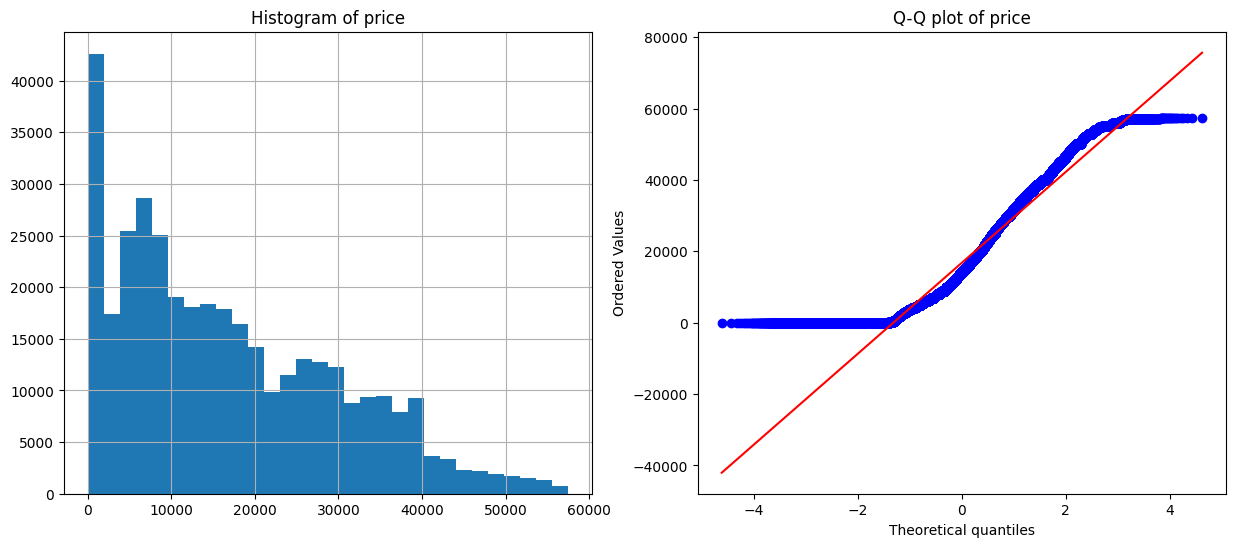

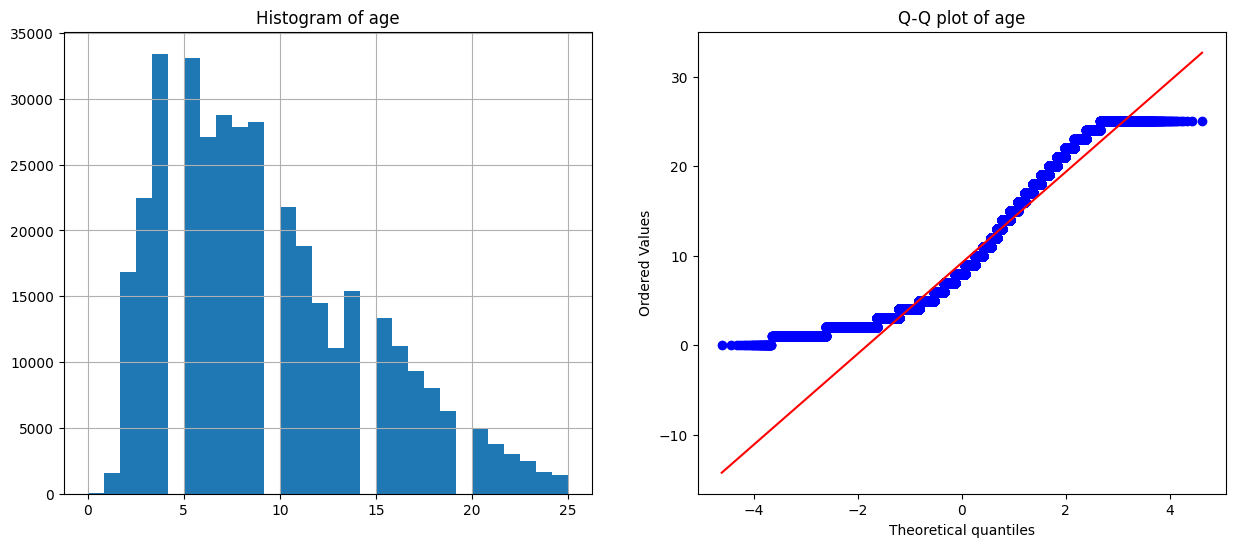

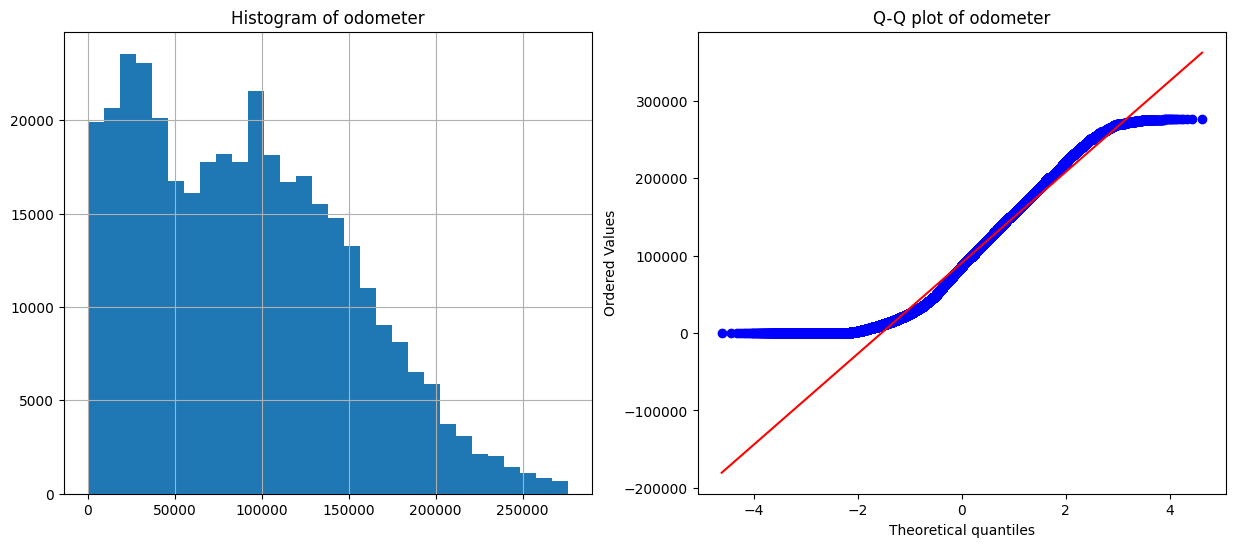

In [31]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.title(f"Histogram of {variable}")
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title(f"Q-Q plot of {variable}")
    plt.show()

diagnostic_plots(cars_df, 'price')
diagnostic_plots(cars_df, 'age')
diagnostic_plots(cars_df, 'odometer')

Las transformaciones *Box-Cox* y *Yeo-Johnson* son generalizaciones, pues incluyen casos especiales de transformaciones: logarítmica (`λ = 0`), recíproca (`λ = -1`),  raíz cuadrada (`λ = 0.5`) y más exponentes. En *Box-Cox* se evalúan varios valores de `λ` y se selecciona aquel que arroja la mejor transformación

La transformación de *Yeo-Johnson* es una extensión de la transformación de *Box-Cox* que ya no está restringida a valores positivos. En otras palabras, la transformación de *Yeo-Johnson* se puede utilizar en variables con valores cero y negativos, así como valores positivos. Cuando la variable solo tiene valores positivos, la transformación de *Yeo-Johnson* es como la transformación de *Box-Cox* de la variable más uno.

En este caso, como las variables `price` y `odometer` tienen valores de 0, utilizaremos *Yeo-Johnson*.

Recuerda que en `PowerTransformer()` el parámetro `standardize` por defecto es `True`. Con esto, después de hacer la transformación, el resultado se escala con *Z-score*, haciendo que la media sea 0 y la desviación estándar 1. Como en el ejercicio 6 ocuparás Min-Max para escalar, haz `standardize=False` para omitir el escalamiento en esta fase.

5b) Aplica la transformación Yeo-Johnson para reducir el sesgo en estas variables. Coloca el resultado en un dataframe denominado `transf_df` que contenga sólo las variables transformadas.

In [32]:
from sklearn.preprocessing import PowerTransformer

In [33]:
transformer = PowerTransformer(method="yeo-johnson", standardize=False)
transformer.fit(cars_df[['age','price','odometer']])
transf_df = transformer.transform(cars_df[['age','price','odometer']])
transf_df = pd.DataFrame(transf_df, columns=['age','price','odometer'])
transf_df

,age,price,odometer
0,2.750246,194.933364,623.675987
1,3.338513,164.326657,695.994731
2,1.226721,209.204110,346.526341
3,2.149194,188.293578,519.996769
4,2.914458,137.708592,949.705360
...,...,...,...
366323,1.594338,167.423035,456.840699
366324,1.226721,187.243996,270.474616
366325,1.226721,198.386565,153.705344
366326,1.894201,182.964760,440.666821


5c) Dibuja nuevamente los gráficos Q-Q y los histogramas para observar el efecto de la transformación.

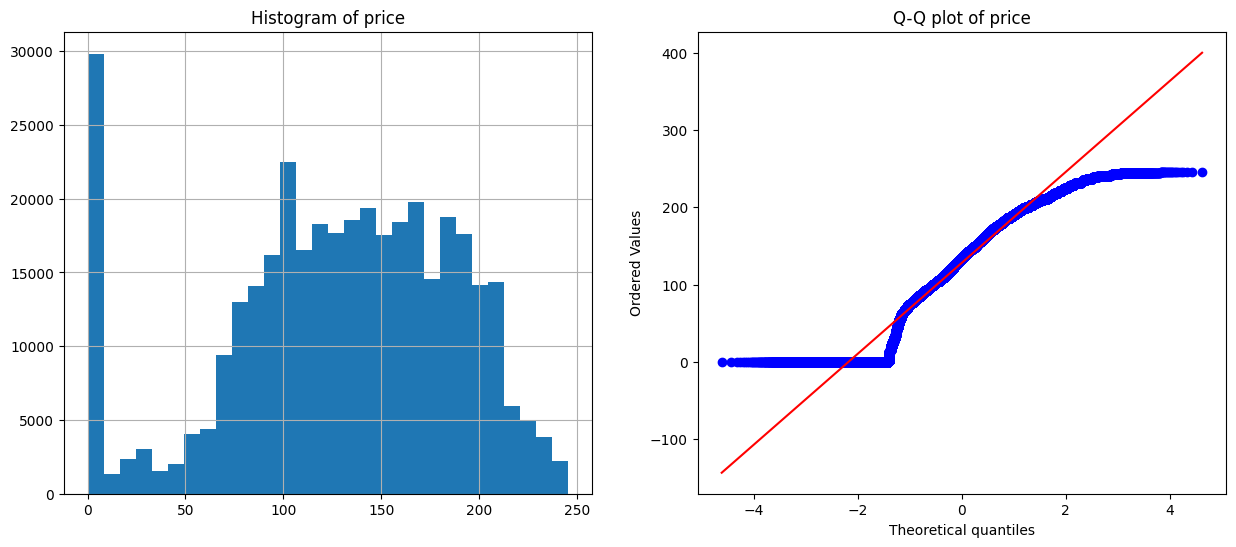

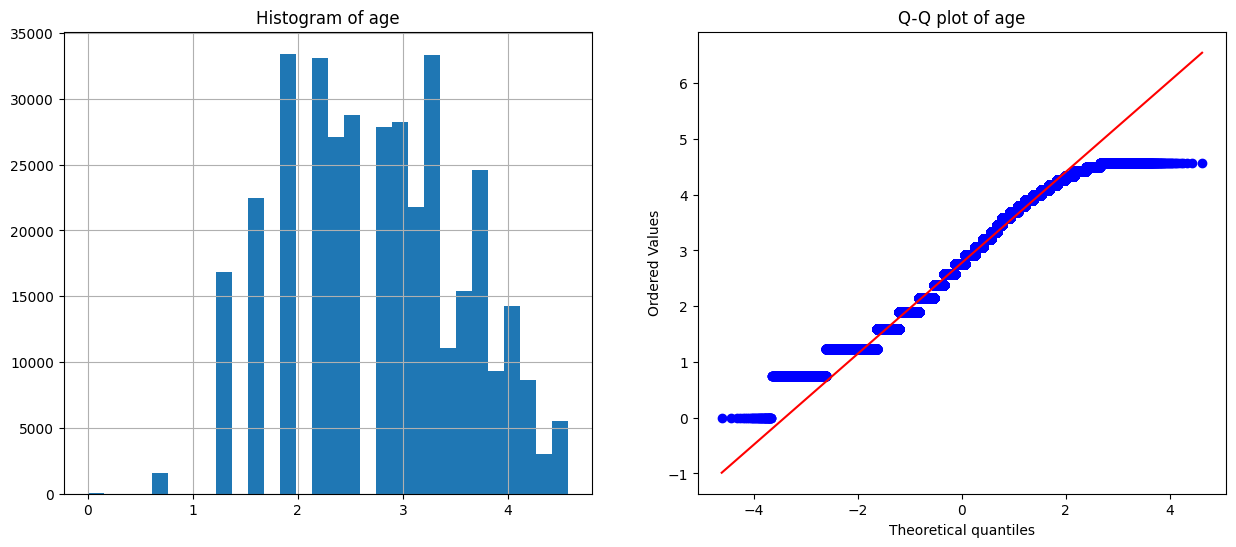

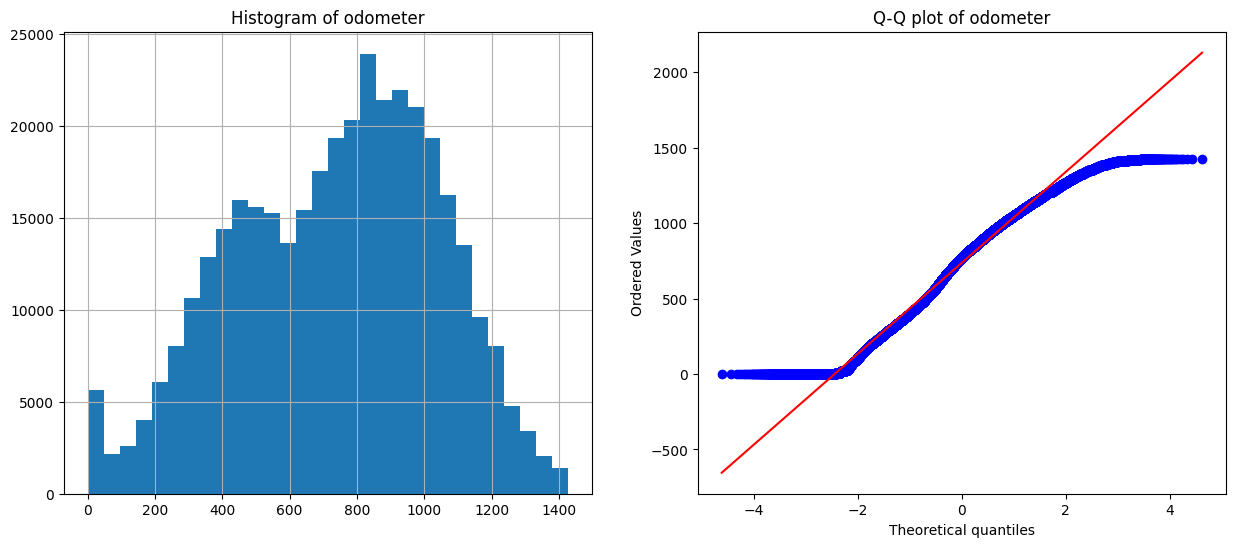

In [34]:
diagnostic_plots(transf_df, 'price')
diagnostic_plots(transf_df, 'age')
diagnostic_plots(transf_df, 'odometer')

## Escalando variables numéricas

6a) Como las tres variables poseen diferentes escalas, aplica el método Min-Max (al dataframe obtenido: `transf_df`) para que queden en el rango fijo [0 a 1]. Coloca el resultado en un dataframe denominado `minmax_df`.


In [35]:
from sklearn import preprocessing
transformer = preprocessing.MinMaxScaler(feature_range=(0, 1))
transformer.fit(transf_df[['price', 'age', 'odometer']])
minmax_df = transformer.transform(transf_df[['price', 'age', 'odometer']])
minmax_df = pd.DataFrame(minmax_df, columns=['minmax_age','minmax_price','minmax_odometer'])
minmax_df

,minmax_age,minmax_price,minmax_odometer
0,0.794060,0.601757,0.437060
1,0.669384,0.730471,0.487739
2,0.852192,0.268408,0.242839
3,0.767013,0.470246,0.364403
4,0.560956,0.637687,0.665534
...,...,...,...
366323,0.681997,0.348843,0.320145
366324,0.762738,0.268408,0.189543
366325,0.808127,0.268408,0.107714
366326,0.745306,0.414453,0.308810


6b) Dibuja nuevamente los histogramas para verificar que el escalamiento no cambia la distribución.

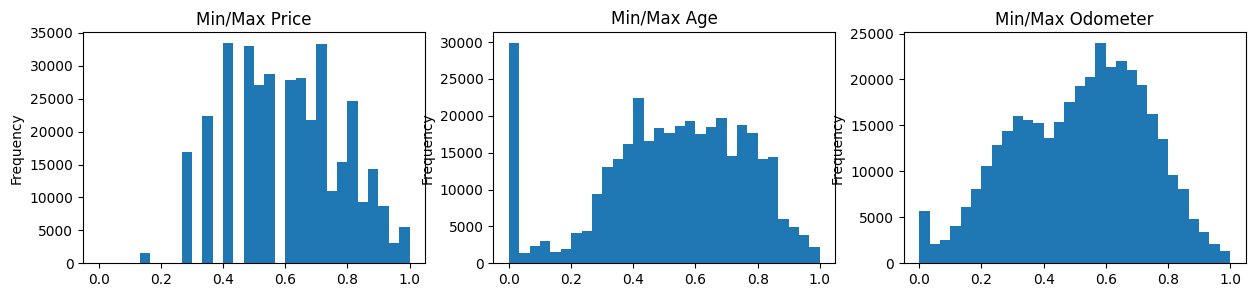

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3))
minmax_df['minmax_price'].plot.hist(ax=axes[0], bins=30)
axes[0].set_title("Min/Max Price")
minmax_df['minmax_age'].plot.hist(ax=axes[1], bins=30)
axes[1].set_title("Min/Max Age")
minmax_df['minmax_odometer'].plot.hist(ax=axes[2], bins=30)
axes[2].set_title("Min/Max Odometer")
plt.show()

## Codificando variables categóricas


7a) Utiliza el método `describe()` para obtener el resumen de las estadísticas descriptivas en las variables categóricas.

In [37]:
cars_df.describe(include = 'object').T

,count,unique,top,freq
region,366328,404,columbus,3188
region_url,366328,413,https://grandrapids.craigslist.org,2737
manufacturer,366328,40,ford,61660
model,366328,19097,f-150,7436
fuel,366328,5,gas,312085
title_status,366328,6,clean,354717
transmission,366328,3,automatic,291628
type,366328,13,sedan,154259
state,366328,51,ca,42062


7b) Según la cardinalidad observada, separa en dos listas (`highly_cardinal_variables` y `few_cardinal_variables`) los nombres de las variables con alta cardinalidad y baja cardinalidad respectivamente. Una variable es considerada de alta cardinalidad cuando tiene cientos de valores únicos.

In [38]:
highly_cardinal_variables = cars_df.describe(include = 'object').T.unique > 100
highly_cardinal_variables = cars_df.describe(include = 'object').T.unique[highly_cardinal_variables]
highly_cardinal_variables = highly_cardinal_variables.index.tolist()
highly_cardinal_variables

['region', 'region_url', 'model']

In [39]:
few_cardinal_variables = cars_df.describe(include = 'object').T.unique < 100
few_cardinal_variables = cars_df.describe(include = 'object').T.unique[few_cardinal_variables]
few_cardinal_variables = few_cardinal_variables.index.tolist()
few_cardinal_variables

['manufacturer', 'fuel', 'title_status', 'transmission', 'type', 'state']

<font color="#0679c8">Tenemos 3 variables de alta cardinalidad (region, region_url y model) y 6 de baja cardinalidad (manufacturer, fuel, title, status, transmission, type, state)</font>


7c) Visualiza en gráficos de barras la frecuencias de las categorías para las variables con baja cardinalidad (en `few_cardinal_variables`)

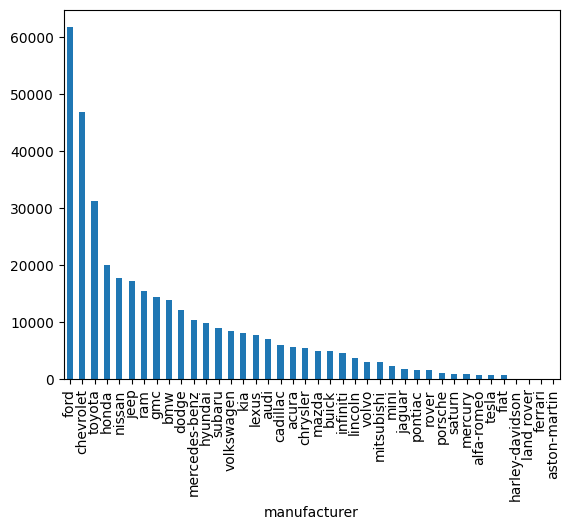

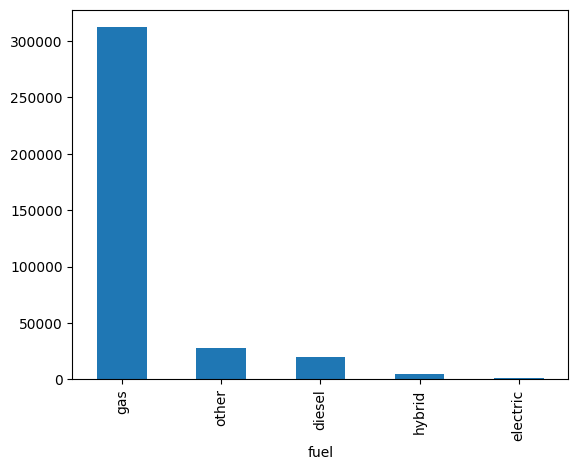

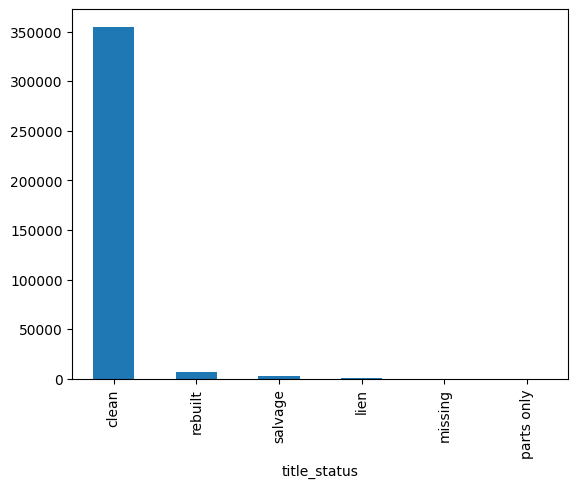

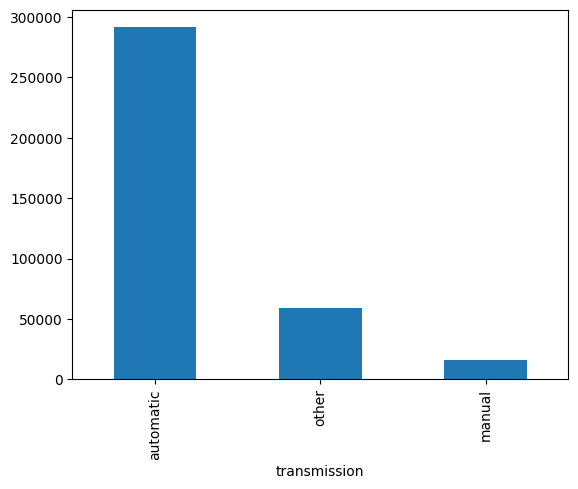

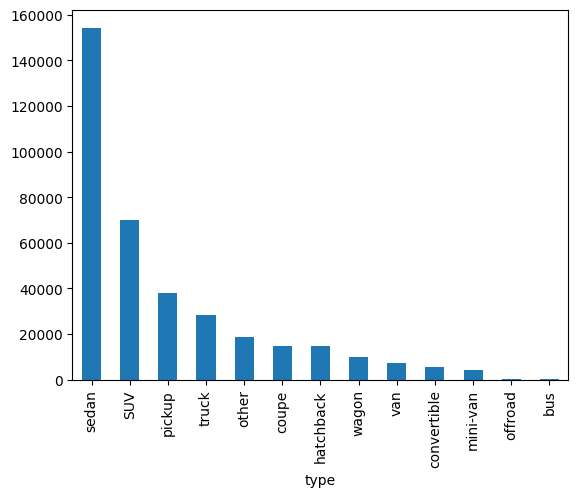

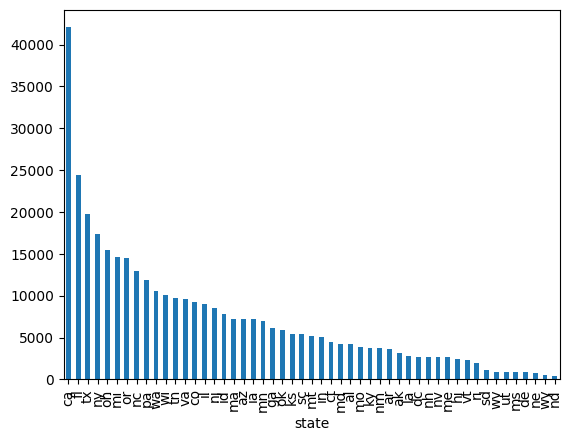

In [40]:
for variable in few_cardinal_variables:
  cars_df[variable].value_counts().plot(kind='bar')
  plt.show()

8. Aplica codificación *one-hot* a las variables en `few_cardinal_variables`, borrando la primera categoría (`drop='first'`). Coloca el resultado en un dataframe denominado `onehot_df`.

In [41]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)
onehot_df = encoder.fit_transform(cars_df[few_cardinal_variables])
onehot_df = pd.DataFrame(onehot_df, columns=encoder.get_feature_names_out())
onehot_df

,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_dodge,manufacturer_ferrari,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
366324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
366325,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
366326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


9. Aplica codificación binaria a las variables en `highly_cardinal_variables`. Coloca el resultado en un dataframe denominado `binary_df`.

In [42]:
!pip install category_encoders
from category_encoders.binary import BinaryEncoder

In [43]:
encoder = BinaryEncoder()
binary_df = encoder.fit_transform(cars_df[highly_cardinal_variables])
binary_df

,region_0,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8,region_url_0,...,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12,model_13,model_14
27,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
28,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
29,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
30,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
31,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,1,1,0,0,1,0,1,0,0,1,...,1,1,0,0,1,0,0,1,1,0
426876,1,1,0,0,1,0,1,0,0,1,...,0,0,0,0,1,1,0,1,1,1
426877,1,1,0,0,1,0,1,0,0,1,...,0,0,0,0,0,1,1,0,1,1
426878,1,1,0,0,1,0,1,0,0,1,...,1,1,1,0,1,1,1,1,0,1


10. Concatena los dataframes obtenidos: `minmax_df` (cuyas variables numéricas ya están transformadas y escaladas) y las codificaciones anteriores (`onehot_df` y `binary_df`). Toma en cuenta que si los índices de los dataframes no coinciden, la concatenación no se realizará correctamente. Utiliza `reset_index(drop=True, inplace=True)` para restablecer los índices.

In [44]:
minmax_df.reset_index(drop=True, inplace=True)
onehot_df.reset_index(drop=True, inplace=True)
binary_df.reset_index(drop=True, inplace=True)
pd.concat([minmax_df, onehot_df, binary_df], axis=1)

,minmax_age,minmax_price,minmax_odometer,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,...,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12,model_13,model_14
0,0.794060,0.601757,0.437060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0.669384,0.730471,0.487739,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,1,0
2,0.852192,0.268408,0.242839,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,1,1
3,0.767013,0.470246,0.364403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,0.560956,0.637687,0.665534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366323,0.681997,0.348843,0.320145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0,0,1,0,0,1,1,0
366324,0.762738,0.268408,0.189543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,1,0,1,1,1
366325,0.808127,0.268408,0.107714,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,1,1,0,1,1
366326,0.745306,0.414453,0.308810,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,0,1,1,1,1,0,1
